Connected to base (Python 3.13.5)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d

In [2]:
korean = pd.read_excel("data/KoreanAuroraRecords/Ancient Korean Aurora.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'data/KoreanAuroraRecords/Ancient Korean Aurora.xlsx'

In [ ]:
counts = korean["Year"].value_counts().sort_index()
years = counts.index.values
vals = counts.values

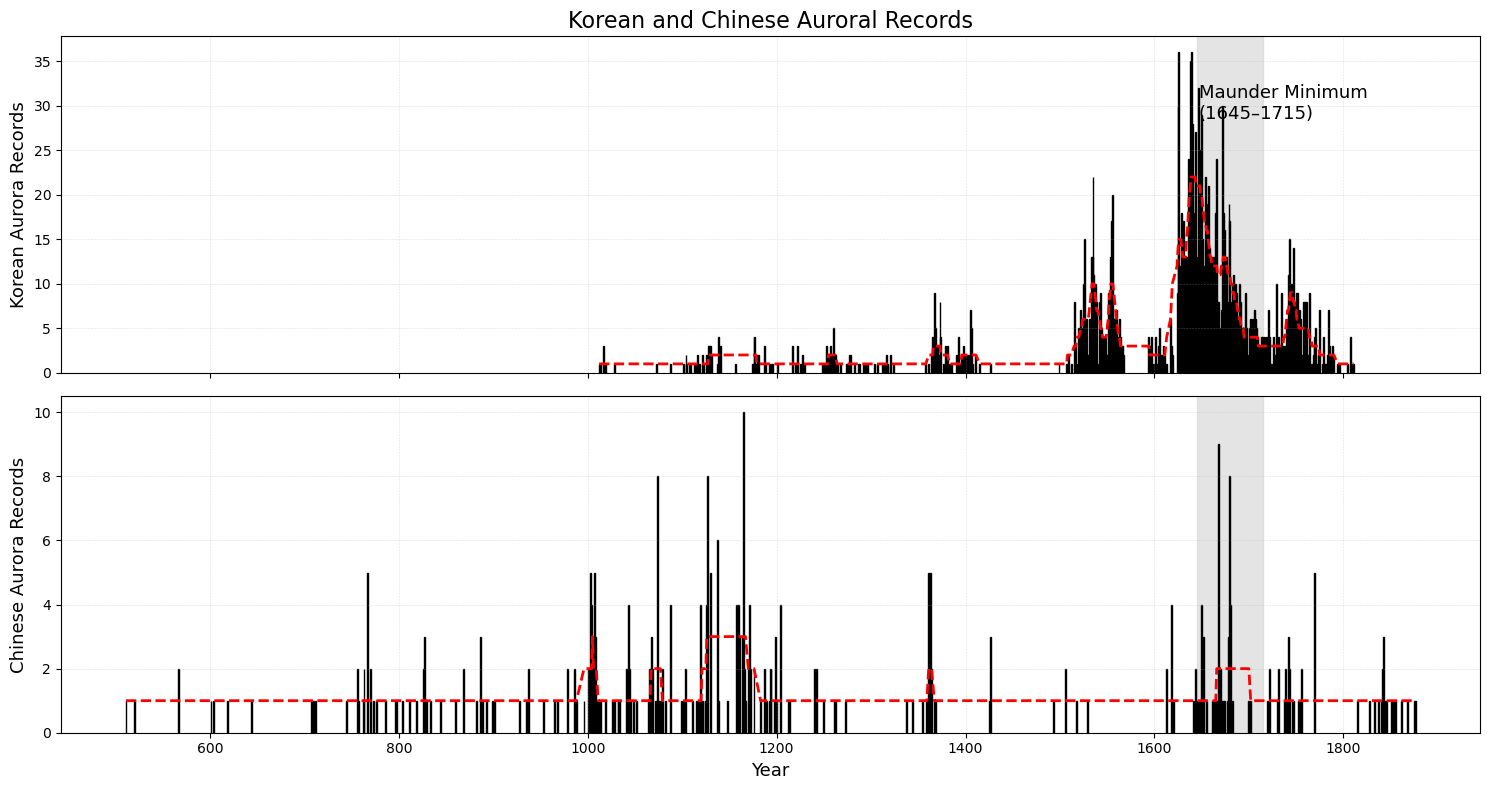

In [ ]:
## All combined plot
k_counts = korean["Year"].value_counts().sort_index()
k_years  = k_counts.index.values
k_vals   = k_counts.values
k_smooth = gaussian_filter1d(k_vals, sigma=3)

c_counts = chinese["Year"].value_counts().sort_index()
c_years  = c_counts.index.values
c_vals   = c_counts.values
c_smooth = gaussian_filter1d(c_vals, sigma=3)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True,
    gridspec_kw={"height_ratios": [1, 1]})

ax1.axvspan(1645, 1715, color="lightgray", alpha=0.6)
ax1.bar(k_years, k_vals, color="gray", edgecolor="black", width=1.0)
ax1.plot(k_years, k_smooth, color="red", linestyle="--", linewidth=2)
ax1.text(1647, max(k_vals) * 0.9,"Maunder Minimum\n(1645–1715)", 
         fontsize=13, ha="left", va="top")
ax1.set_ylabel("Korean Aurora Records", fontsize=13)
ax1.grid(True, linestyle="--", linewidth=0.4, alpha=0.4)
ax1.set_title("Korean and Chinese Auroral Records", fontsize=16)

ax2.axvspan(1645, 1715, color="lightgray", alpha=0.6)
ax2.bar(c_years, c_vals, color="gray", edgecolor="black", width=1.0)
ax2.plot(c_years, c_smooth, color="red", linestyle="--", linewidth=2)
ax2.set_xlabel("Year", fontsize=13)
ax2.set_ylabel("Chinese Aurora Records", fontsize=13)
ax2.grid(True, linestyle="--", linewidth=0.4, alpha=0.4)

plt.tight_layout()
plt.show()